In [1]:
import pandas as pd
#I start by loading the Eurostat dataset, wich is compressed in .gz format
df = pd.read_csv('euro_unemployment_data.csv.gz', compression='gzip', low_memory=False)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   STRUCTURE                               1065 non-null   object 
 1   STRUCTURE_ID                            1065 non-null   object 
 2   STRUCTURE_NAME                          1065 non-null   object 
 3   freq                                    1065 non-null   object 
 4   Time frequency                          1065 non-null   object 
 5   age                                     1065 non-null   object 
 6   Age class                               1065 non-null   object 
 7   unit                                    1065 non-null   object 
 8   Unit of measure                         1065 non-null   object 
 9   sex                                     1065 non-null   object 
 10  Sex                                     1065 non-null   obje

,TIME_PERIOD,Time,OBS_VALUE,Observation value,CONF_STATUS,Confidentiality status (flag)
count,1065.000000,0.0,1065.000000,0.0,0.0,0.0
mean,2019.453521,NaN,469.824131,NaN,NaN,NaN
std,2.863425,NaN,2087.216877,NaN,NaN,NaN
min,2015.000000,NaN,1.300000,NaN,NaN,NaN
25%,2017.000000,NaN,4.500000,NaN,NaN,NaN
50%,2019.000000,NaN,7.200000,NaN,NaN,NaN
75%,2022.000000,NaN,111.000000,NaN,NaN,NaN
max,2024.000000,NaN,21241.000000,NaN,NaN,NaN


In [2]:
#I check wich units are present in the dataset to filter only the relevant one
print(df['unit'].unique())
#I keep only the rows where the unit is PC_POP, which means the unemployment rate as a percentage of the population
df = df[df['unit'] == 'PC_POP']
#I select only the rilevant columns for my analysis
df_cleaned = df[['TIME_PERIOD', 'geo', 'sex', 'age', 'OBS_VALUE']].copy()
#I rename the columns to make them more readeble and consistent
df_cleaned.columns = ['year', 'country', 'sex', 'age_group', 'unemployment_rate']
#I remove rows with missing unemployment rate values to ensure data quality
df_cleaned.dropna(subset=['unemployment_rate'], inplace=True)
#I save the cleaned dataset to a new csv file for later analysis
df_cleaned.to_csv('europe_unemployment_cleaned.csv',index=False)
print(df_cleaned.head())
print(df_cleaned[df_cleaned['country']== 'IT'])

['PC_ACT' 'PC_POP' 'THS_PER']
     year country sex age_group  unemployment_rate
355  2015      AT   T    Y15-74                4.1
356  2016      AT   T    Y15-74                4.4
357  2017      AT   T    Y15-74                4.0
358  2018      AT   T    Y15-74                3.6
359  2019      AT   T    Y15-74                3.3
     year country sex age_group  unemployment_rate
548  2015      IT   T    Y15-74                6.7
549  2016      IT   T    Y15-74                6.6
550  2017      IT   T    Y15-74                6.4
551  2018      IT   T    Y15-74                6.1
552  2019      IT   T    Y15-74                5.7
553  2020      IT   T    Y15-74                5.2
554  2021      IT   T    Y15-74                5.3
555  2022      IT   T    Y15-74                4.6
556  2023      IT   T    Y15-74                4.4
557  2024      IT   T    Y15-74                3.8


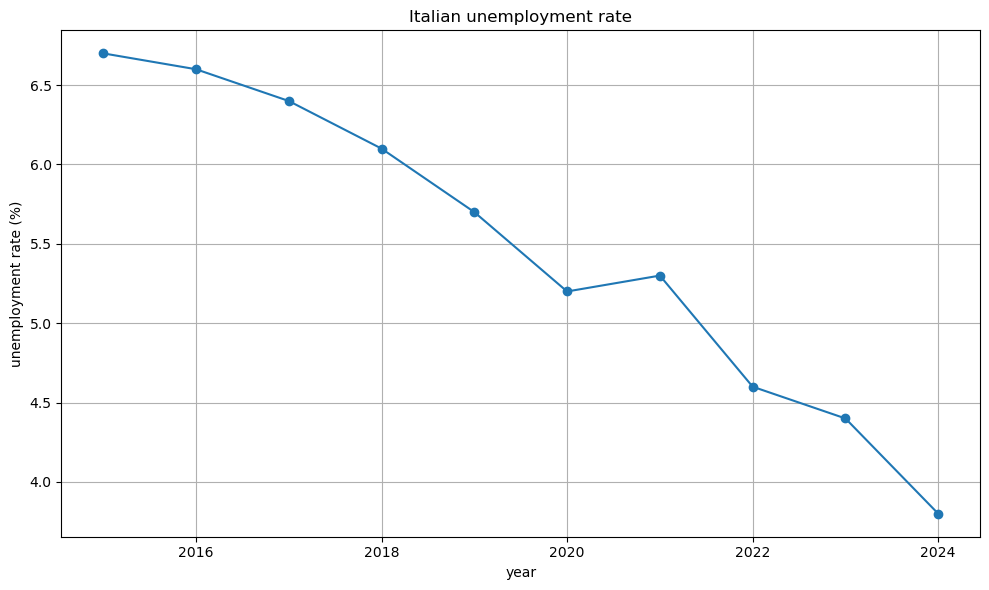

In [5]:
#I filter the dataset to include only data for Italy, for both sexes(totaly), and for the age group(15-74)
italy = df_cleaned[(df_cleaned['country'] == 'IT') &
                   (df_cleaned['sex'] == 'T') &
                  (df_cleaned['age_group'] == 'Y15-74')].copy()
#I sort the data by year to prepare it for a time series plot
italy.sort_values('year', inplace=True)
import matplotlib.pyplot as plt
#I plot the unemployment rate over the years using a line chart
plt.figure(figsize=(10,6))
plt.plot( italy['year'], italy['unemployment_rate'], marker='o')
plt.title('Italian unemployment rate')
plt.xlabel('year')
plt.ylabel('unemployment rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

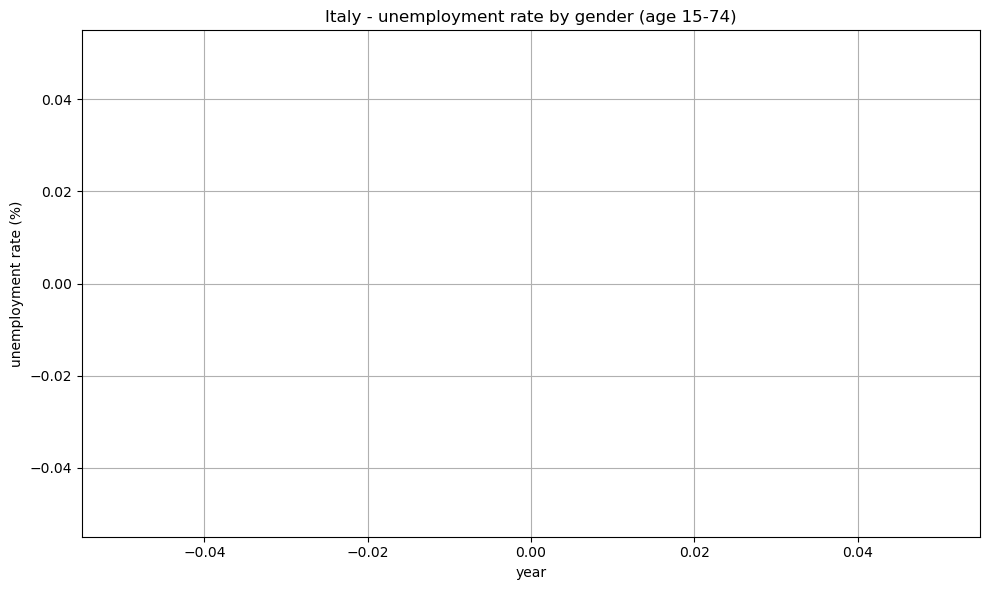

In [3]:
#The available dataset doesn't include separate values for male and female in the 'sex' column, but if it did, I would use this code:
import matplotlib.pyplot as plt
#I filter the dataset to include only data for Italy and 15-74 age group
it_gender = df_cleaned[(df_cleaned['country'] == 'IT') & (df_cleaned['age_group'] == 'Y15-74')]
plt.figure(figsize=(10,6))
#I loop though both male (M) and female (F) data to plot each gender separately
for gender, label in zip(['M', 'F'], ['Male', 'Female']):
    #I filter and sort the data for the current gender
    data = it_gender[it_gender['sex'] == gender].sort_values('year')
    # I plot the unemployment rate over time for the current gender
    plt.plot(data['year'], data['unemployment_rate'], marker='o', label=label)

plt.title('Italy - unemployment rate by gender (age 15-74)')
plt.xlabel('year')
plt.ylabel('unemployment rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

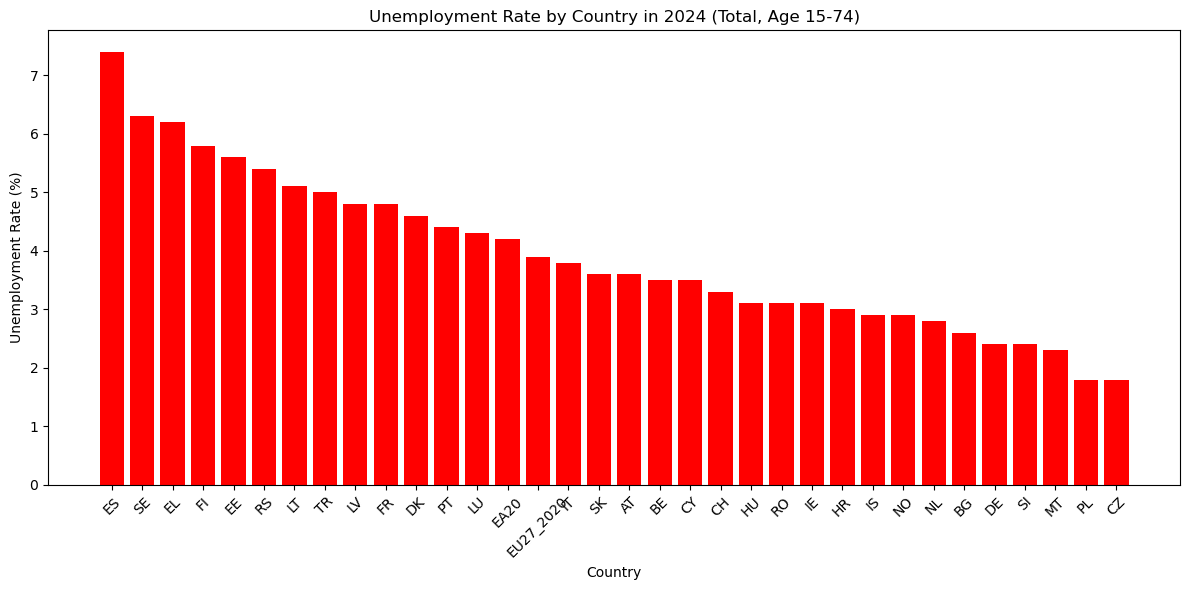

In [4]:
#I filter the dataset to include only the data from year 2024
latest = df_cleaned[(df_cleaned['year'] == 2024) & (df_cleaned['sex'] == 'T') & (df_cleaned['age_group'] == 'Y15-74')]
#I sort the countries by unemployment rate in discending order
top_countries = latest.sort_values('unemployment_rate', ascending=False)
#I create a bar chart to visualize the unemployment rate by county in 2024
plt.figure(figsize=(12,6))
plt.bar(top_countries['country'], top_countries['unemployment_rate'], color='red')
plt.title('Unemployment Rate by Country in 2024 (Total, Age 15-74)')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Test set evaluation:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
Mean Absolute Error (MAE): 0.05
R² Score: 1.00
Predicted unemployment rate for 2025: 3.67%
Predicted unemployment rate for 2026: 3.35%
Predicted unemployment rate for 2027: 3.02%


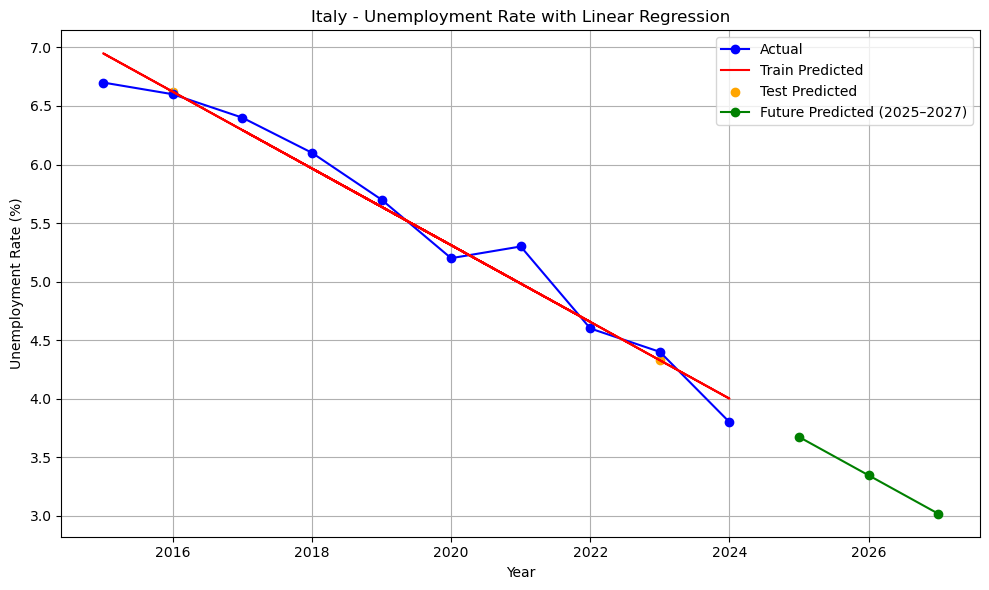

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# I filter the dataset to include only data for Italy, both sexes, age group 15–74
italy = df_cleaned[(df_cleaned['country'] == 'IT') &
                   (df_cleaned['sex'] == 'T') &
                   (df_cleaned['age_group'] == 'Y15-74')].copy()
italy.sort_values('year', inplace=True)
# I define features X and targets y
X = italy[['year']]
y = italy['unemployment_rate']
# I split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# I train the linear regression model using the training set
model = LinearRegression()
model.fit(X_train, y_train)
# I make predictions on the training data
y_pred_train = model.predict(X_train)
# I make predictions on the test data
y_pred_test = model.predict(X_test)
# I calculate and print error metrics on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test set evaluation:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R² Score: {r2_test:.2f}")
# I predict unemployment rate for the years 2025, 2026, and 2027
X_future = pd.DataFrame({'year': [2025, 2026, 2027]})
predictions = model.predict(X_future)
# I print the predictions for each year
for year, rate in zip(X_future['year'], predictions):
    print(f"Predicted unemployment rate for {year}: {rate:.2f}%")
# I plot the actual, predicted (fit), and future predictions
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', label='Actual', color='blue')
plt.plot(X_train, y_pred_train, label='Train Predicted', color='red')
plt.scatter(X_test, y_pred_test, label='Test Predicted', color='orange')
plt.plot(X_future['year'], predictions, marker='o', label='Future Predicted (2025–2027)', color='green')
plt.title('Italy - Unemployment Rate with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
